# Overview

This Python script will visualize the weather of 500+ unique cities across the world in random locations. [Citipy](https://pypi.python.org/pypi/citipy) a simple city-finding python package will be used to find randomly located cities, and the [OpenWeatherMap API](https://openweathermap.org/api), will return current weather statistics for those cities.

A series of scatter plots will be used to showcase the following relationships:

* Temperature (F) vs. Latitude.
* Humidity (%) vs. Latitude.
* Cloudiness (%) vs. Latitude.
* Wind Speed (mph) vs. Latitude.

Specificially, this script will:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

In [39]:
# Import dependencies.
from citipy import citipy
import numpy as np
import pandas as pd
import random
import requests as req
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Import Open Weather Map API keys.
from openWeatherMapApiKeys import apiKey


In [31]:
# Declare variables describing the scope of lat/lng search for cities.
latDim = {'min': -55, 'max': 65}
lngDim = {'min': -140, 'max': 180}

# Create arrays containing increments of lat and long.
latVals = np.arange(latDim['min'], latDim['max'], 0.1)
lngVals = np.arange(lngDim['min'], lngDim['max'], 0.1)

In [46]:
# Create an empty data frame that will contain details of our randomly selected cities.
cities = ''
colNames = ('cityName', 'countryCode', 'randLat', 'randLng', 'uniqueName', 'Latitude', 'Longitude','Temperature',
            'Humidity','Cloudiness','WindSpeed')
cities = pd.DataFrame(columns = colNames)

In [48]:
# Query Citipy for random lat long values until we collect our sample, and append weather
# data via API call.

# Set the sample size (this will return exactly as many records as the sample size).
sampleSize = 60

baseUrl = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

while len(cities) <= sampleSize:
    # Choose a random point within our lat-lng domain.
    randLat = random.choice(latVals)
    randLng = random.choice(lngVals)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(randLat, randLng)
    cityName = city.city_name
    countryCode = city.country_code
    # Check if the combination of city name and country code from citipy is already present in our data frame
    # This is the best that can be done with the nearest_city() method.
    if cityName + countryCode in cities.uniqueName.tolist():
        pass
    else:
        url = baseUrl + cityName + ',' + countryCode + '&units=' + units + '&APPID=' + apiKey
        weather_response = req.get(url)
        weather_json = weather_response.json()
        print('Status code: %s DF Length is now: %s' % (str(weather_json["cod"]), str(len(cities))))
        if weather_json["cod"] == 200:
            print('City %s: %s loaded with status %s: %s' % (weather_json['id'], weather_json['name'], weather_json["cod"], url))
            Latitude = weather_json["coord"]["lat"]
            Longitude = weather_json["coord"]["lon"]
            Temperature = weather_json["main"]["temp"]
            Humidity = weather_json["main"]["humidity"]
            Cloudiness = weather_json["clouds"]["all"]
            WindSpeed = weather_json["wind"]["speed"]
            cities.loc[len(cities)+1] = [weather_json['name'], countryCode, randLat, randLng, cityName+countryCode, Latitude, Longitude, Temperature, Humidity, Cloudiness, WindSpeed]
#             cities = concat(cities, DataFrame([{'cityName': cityName, 'countryCode' : countryCode, 'randLat' : randLat,'randLng' : randLng, 'uniqueName' : cityName, 'Latitude' : Latitude, 'Longitude' : Longitude,'Temperature' : Temperature, 'Humidity' : Humidity,'Cloudiness' : Cloudiness,'WindSpeed' : WindSpeed}])
        else:
            pass


Status code: 200 DF Length is now: 36
City 4013723: Ciudad Constitucion loaded with status 200: http://api.openweathermap.org/data/2.5/weather?q=constitucion,mx&units=imperial&APPID=244a987a274dfd51f4820c3f46a53b02
Status code: 200 DF Length is now: 37
City 6167817: Torbay loaded with status 200: http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&APPID=244a987a274dfd51f4820c3f46a53b02
Status code: 200 DF Length is now: 38
City 3839307: Rawson loaded with status 200: http://api.openweathermap.org/data/2.5/weather?q=rawson,ar&units=imperial&APPID=244a987a274dfd51f4820c3f46a53b02
Status code: 200 DF Length is now: 39
City 964432: Port Alfred loaded with status 200: http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=244a987a274dfd51f4820c3f46a53b02
Status code: 200 DF Length is now: 40
City 3372707: Ribeira Grande loaded with status 200: http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&units=imperial&APPID=244a987a2

In [49]:
cities

,cityName,countryCode,randLat,randLng,uniqueName,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
1,Koror State,pw,9.2,133.3,meyungspw,7.34,134.47,86.86,62.0,75.0,10.29
2,Cape Town,za,-46.8,-5.6,cape townza,-33.93,18.42,53.60,81.0,75.0,16.11
3,Punta Arenas,cl,-51.5,-84.5,punta arenascl,-53.15,-70.92,39.20,100.0,75.0,10.29
4,Rizhao,cn,35.3,119.5,rizhaocn,35.43,119.46,83.28,89.0,24.0,9.75
5,Coquimbo,cl,-30.0,-84.5,coquimbocl,-29.95,-71.34,53.60,81.0,75.0,3.36
6,Bambous Virieux,mu,-36.1,83.4,bambous virieuxmu,-20.34,57.76,69.80,88.0,75.0,4.70
7,Lompoc,us,32.3,-123.5,lompocus,34.64,-120.46,61.75,87.0,90.0,10.29
8,Staraya Poltavka,ru,50.5,46.7,staraya poltavkaru,50.48,46.48,76.26,51.0,68.0,20.04
9,Ingham,au,-18.4,146.7,inghamau,-18.65,146.17,75.00,88.0,0.0,3.94
10,Beloha,mg,-34.0,41.6,belohamg,-25.17,45.05,64.29,95.0,88.0,2.71


In [35]:
print(cities.head())

     cityName countryCode  randLat  randLng  uniqueName  Latitude  Longitude  \
1      gumdag          tm     38.4     53.9      gumdag     39.21      54.59   
2   hithadhoo          mv    -15.1     73.4   hithadhoo     -0.60      73.08   
3     inirida          co      2.2    -68.1     inirida      3.87     -67.92   
4  alexandria          eg     31.6     29.4  alexandria     31.22      29.96   
5  hervey bay          au    -22.3    156.1  hervey bay    -25.28     152.85   

   Temperature  Humidity  Cloudiness  WindSpeed  
1        75.00      22.0         0.0      15.23  
2        84.72     100.0        12.0       5.06  
3        73.92      96.0        36.0       1.92  
4        76.77      74.0         0.0      13.87  
5        70.50      86.0        80.0       9.98  


In [36]:
len(cities)

501

In [37]:
sorted = cities.sort(['Latitude'], ascending=[0]).reset_index()
sorted

/Users/jakram/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,cityName,countryCode,randLat,randLng,uniqueName,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,412,tasiilaq,gl,60.6,-34.1,tasiilaq,65.61,-37.64,42.80,75.0,36.0,8.05
1,473,tasiilaq,gl,64.5,-39.9,tasiilaq,65.61,-37.64,42.80,75.0,36.0,8.05
2,23,nadym,ru,64.3,70.6,nadym,65.53,72.52,48.81,95.0,68.0,4.61
3,497,izhma,ru,64.4,53.8,izhma,65.01,53.91,67.44,77.0,56.0,4.61
4,18,oulainen,fi,64.5,25.1,oulainen,64.27,24.80,46.29,94.0,64.0,4.16
5,286,hofn,is,61.3,-16.1,hofn,64.25,-15.21,46.11,100.0,8.0,8.97
6,341,vestmannaeyjar,is,56.6,-22.0,vestmannaeyjar,63.44,-20.27,46.92,97.0,0.0,2.37
7,292,beringovskiy,ru,54.3,176.4,beringovskiy,63.05,179.32,52.41,93.0,20.0,6.73
8,226,yellowknife,ca,64.4,-117.8,yellowknife,62.46,-114.35,68.00,60.0,75.0,10.29
9,72,sorvag,fo,59.2,-11.5,sorvag,62.08,-7.25,55.40,82.0,92.0,12.75


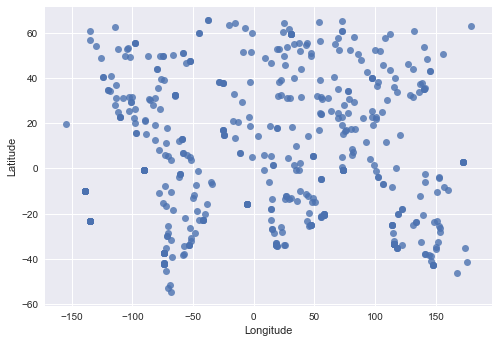

In [38]:
p = sns.regplot(x="Longitude", y="Latitude", data=sorted, fit_reg=False)
plt.show()

/Users/jakram/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


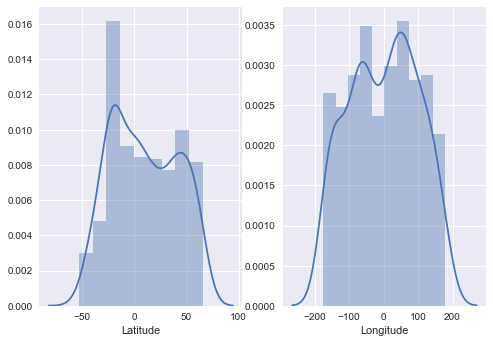

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2)


sns.distplot(sorted['Latitude'],  ax=axs[0])
sns.distplot(sorted['Longitude'],  ax=axs[1])
plt.show()

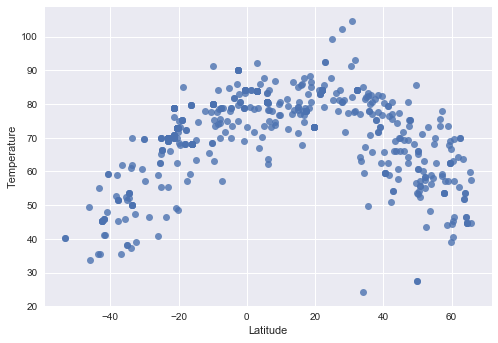

In [12]:
p = sns.regplot(x="Latitude", y="Temperature", data=sorted, fit_reg=False)
plt.show()

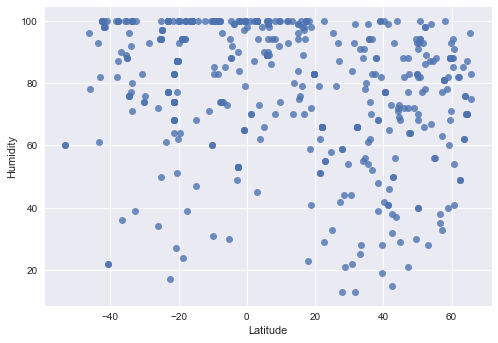

In [13]:
p = sns.regplot(x="Latitude", y="Humidity", data=sorted, fit_reg=False)
plt.show()

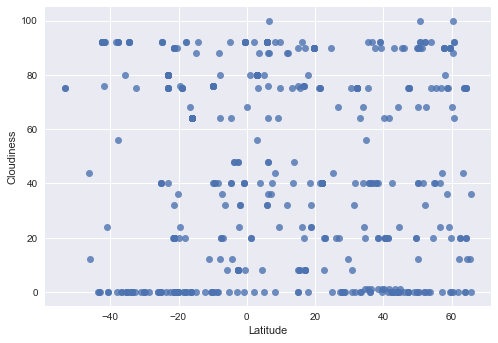

In [16]:
p = sns.regplot(x="Latitude", y="Cloudiness", data=sorted, fit_reg=False)
plt.show()